In [92]:
# pycaret tutorial
# https://colab.research.google.com/github/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Regression.ipynb#scrollTo=824bafdc
# https://pycaret.readthedocs.io/en/stable/api/regression.html#pycaret.regression.RegressionExperiment.interpret_model
# data from https://uwy-my.sharepoint.com/:f:/r/personal/pjohns27_uwyo_edu/Documents/Johnson%20Research%20Group/15-Group_Theses+Dissertations/Todd%20Muller/Data/Batch%20Experiments/2023-04-02-BATCH-1?csf=1&web=1&e=UjRfBQ  

In [90]:
import pandas as pd 
from pycaret.regression import setup, compare_models, create_model,\
                                plot_model, predict_model, save_model, load_model, interpret_model,\
                                evaluate_model, get_config, set_config, pull

In [74]:
df = pd.read_csv('data.csv').dropna(axis=1)
df.head()
df = df[df.resistance < 1e3]
df = df.drop(['passes'], axis=1)
df

,power,time,pressure,resistance
3,2562,26810,780,0.437000
7,919,22439,670,1.540000
8,2442,2313,170,0.482871
12,2599,13982,800,14.842648
14,1946,24539,790,20.029546
...,...,...,...,...
130,2059,2000,150,0.522129
131,2071,2000,160,0.479499
132,2002,2000,150,1.716191
133,1277,13983,510,4.689228


In [75]:
exp = setup(df, target='resistance', session_id=123)

,Description,Value
0,Session id,123
1,Target,resistance
2,Target type,Regression
3,Original data shape,"(101, 4)"
4,Transformed data shape,"(101, 4)"
5,Transformed train set shape,"(70, 4)"
6,Transformed test set shape,"(31, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [76]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:59:08
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,3.4021,438.7275,8.3492,-1.0453,0.5774,0.4401,0.1080
knn,K Neighbors Regressor,4.4575,468.0975,10.0382,-19.3212,0.6633,2.4999,0.0930
et,Extra Trees Regressor,6.5912,704.4065,15.2524,-25.1734,0.7071,3.1278,0.3480
rf,Random Forest Regressor,7.3223,813.8856,17.8924,-52.3274,0.7504,4.7536,0.4400
xgboost,Extreme Gradient Boosting,8.1100,1210.1935,20.3376,-80.4596,0.6804,5.7799,0.1050
dt,Decision Tree Regressor,8.1530,1210.4436,20.4423,-83.0850,0.7048,5.7603,0.1240
gbr,Gradient Boosting Regressor,8.8244,1257.1981,21.7340,-84.3895,0.7321,6.4701,0.1890
ada,AdaBoost Regressor,8.8268,1210.6670,20.7144,-144.9733,0.9294,7.4041,0.2460
dummy,Dummy Regressor,5.7980,441.0019,10.0045,-251.2106,1.1733,5.1349,0.0960
lightgbm,Light Gradient Boosting Machine,6.3942,445.9828,11.3411,-254.5116,1.1340,5.4147,0.1200


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

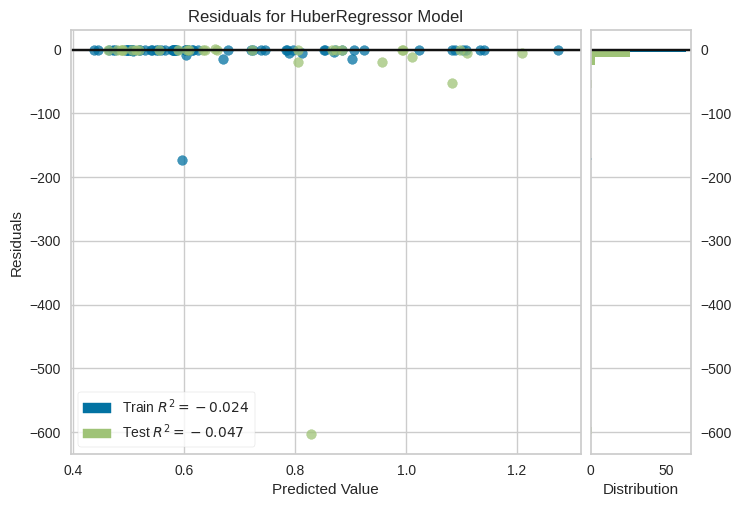

In [77]:
plot_model(best, plot = 'residuals')

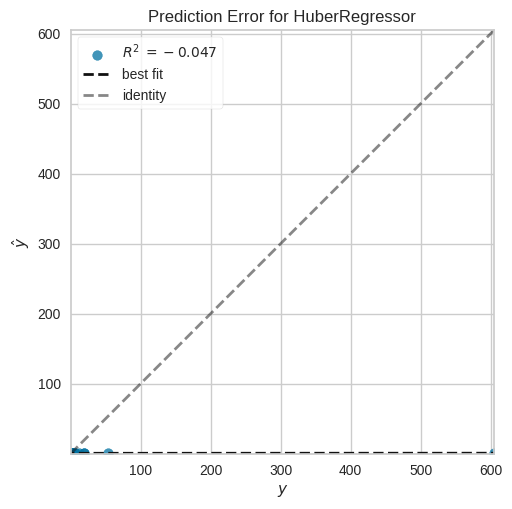

In [78]:
# plot error
plot_model(best, plot = 'error')

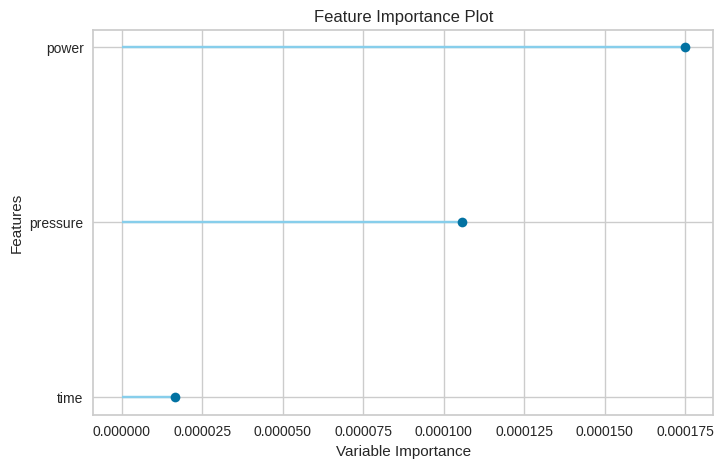

In [79]:
plot_model(best, plot = 'feature')

In [15]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [16]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,10538984.6159,498529853577477.7500,22327782.1016,-0.2867,7.6522,5.9472


In [17]:
# copy data and drop charges

new_data = df.copy()
new_data.drop('resistance', axis=1, inplace=True)
new_data.head()

,power,time,pressure,passes
0,2232,19360,330,2
1,1062,15598,120,8
2,344,17846,180,9
3,2562,26810,780,2
4,106,6466,230,8


In [18]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,power,time,pressure,passes,prediction_label
0,2232,19360,330,2,16.365247
1,1062,15598,120,8,13.681543
2,344,17846,180,9,16.210720
3,2562,26810,780,2,22.960092
4,106,6466,230,8,5.862721


In [19]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['power', 'time', 'pressure',
                                              'passes'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', HuberRegressor())]),
 'my_first_pipeline.pkl')

In [20]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['power', 'time', 'pressure',
                                             'passes'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model', HuberRegressor())])

In [21]:
s = setup(df, target = 'resistance', session_id = 123)

,Description,Value
0,Session id,123
1,Target,resistance
2,Target type,Regression
3,Original data shape,"(136, 5)"
4,Transformed data shape,"(136, 5)"
5,Transformed train set shape,"(95, 5)"
6,Transformed test set shape,"(41, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [24]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [25]:
# lets access X_train_transformed
get_config('X_train_transformed')

,power,time,pressure,passes
71,1473.0,2000.0,170.0,4.0
91,1597.0,2000.0,510.0,2.0
95,1377.0,2000.0,750.0,3.0
107,2031.0,2000.0,170.0,3.0
104,2032.0,2000.0,190.0,3.0
...,...,...,...,...
17,100.0,2000.0,170.0,2.0
98,1767.0,2000.0,490.0,2.0
66,1434.0,2000.0,170.0,4.0
126,423.0,2890.0,700.0,1.0


In [26]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [29]:
# init setup with normalize = True
s = setup(df, target = 'resistance', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,resistance
2,Target type,Regression
3,Original data shape,"(136, 5)"
4,Transformed data shape,"(136, 5)"
5,Transformed train set shape,"(95, 5)"
6,Transformed test set shape,"(41, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


<AxesSubplot:>

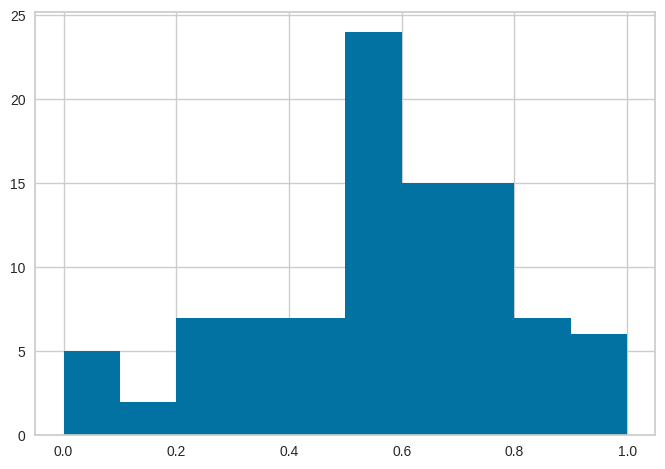

In [30]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['power'].hist()

<AxesSubplot:>

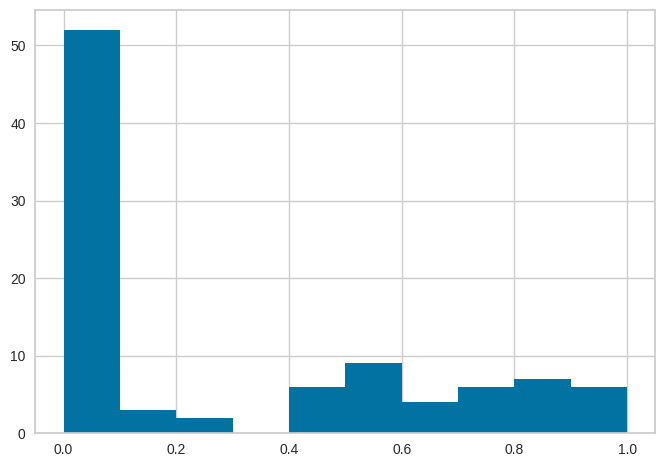

In [31]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['time'].hist()

<AxesSubplot:>

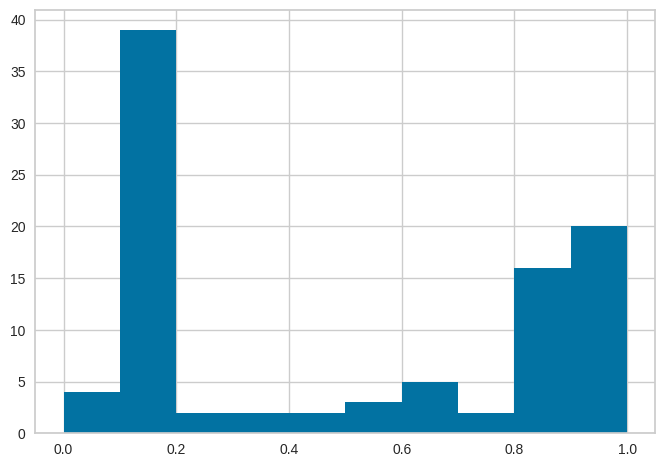

In [32]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['pressure'].hist()

In [33]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,4957418.4790,235262382653421.7812,11579241.5278,-0.1381,5.5928,291.4781,0.0490
par,Passive Aggressive Regressor,4957228.6145,235265693125375.5312,11579366.2457,-0.1948,4.9412,6.8806,0.0810
br,Bayesian Ridge,9024796.5520,216527443604844.9062,13025656.6809,-4391417.1676,13.1215,5676605.5841,0.0440
dummy,Dummy Regressor,9024796.4500,216527428124672.0000,13025656.2500,-4391417.2746,13.1215,5676605.5000,0.0490
en,Elastic Net,8619801.6803,198876774836313.4688,12499488.8572,-4753087.9011,13.0491,5174931.3595,0.0400
knn,K Neighbors Regressor,6143526.3625,153466292561510.4062,10682569.0250,-8726269.2959,8.0648,2460911.2341,0.0420
rf,Random Forest Regressor,6399188.3559,174308133785992.5000,10678264.1293,-9742305.3337,9.6224,3291803.7673,0.2390
omp,Orthogonal Matching Pursuit,8733129.6347,204882042612240.6250,13219756.3360,-11844566.1771,12.6361,4564149.6830,0.0430
ridge,Ridge Regression,7804933.6985,155685144628794.2188,11409625.3963,-12329363.9270,12.7068,4566997.7406,0.0380
lightgbm,Light Gradient Boosting Machine,7953078.7860,181824702860198.6562,12266501.3087,-13700647.4113,12.6172,4205203.4639,0.0730


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [36]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,6399188.3559,174308133785992.5000,10678264.1293,-9742305.3337,9.6224,3291803.7673,0.1020
lightgbm,Light Gradient Boosting Machine,7953078.7860,181824702860198.6562,12266501.3087,-13700647.4113,12.6172,4205203.4639,0.0590
gbr,Gradient Boosting Regressor,7278650.0939,262003741072654.7812,13043415.1640,-20233641.3904,10.8160,4327551.2160,0.0840
xgboost,Extreme Gradient Boosting,8064585.6391,294067443563724.8125,14009960.6969,-22149984.0063,9.0234,5262065.0477,0.0710
et,Extra Trees Regressor,7730870.8144,230840981760806.3438,13305462.2007,-30163468.0898,9.2285,4352800.0748,0.1490
dt,Decision Tree Regressor,7395418.3059,349026963282180.6250,15239229.5580,-30563726.1303,6.5108,6080928.8577,0.0550


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

In [40]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,6.399188e+06,1.743081e+14,1.067826e+07,-9.742305e+06,9.6224,3.291804e+06,0.102
lightgbm,Light Gradient Boosting Machine,7.953079e+06,1.818247e+14,1.226650e+07,-1.370065e+07,12.6172,4.205203e+06,0.059
gbr,Gradient Boosting Regressor,7.278650e+06,2.620037e+14,1.304342e+07,-2.023364e+07,10.8160,4.327551e+06,0.084
xgboost,Extreme Gradient Boosting,8.064586e+06,2.940674e+14,1.400996e+07,-2.214998e+07,9.0234,5.262065e+06,0.071
et,Extra Trees Regressor,7.730871e+06,2.308410e+14,1.330546e+07,-3.016347e+07,9.2285,4.352800e+06,0.149
dt,Decision Tree Regressor,7.395418e+06,3.490270e+14,1.523923e+07,-3.056373e+07,6.5108,6.080929e+06,0.055


In [41]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
par,Passive Aggressive Regressor,4957228.6145,235265693125375.5312,11579366.2457,-0.1948,4.9412,6.8806,0.0410
huber,Huber Regressor,4957418.4790,235262382653421.7812,11579241.5278,-0.1381,5.5928,291.4781,0.0600
knn,K Neighbors Regressor,6143526.3625,153466292561510.4062,10682569.0250,-8726269.2959,8.0648,2460911.2341,0.0660
rf,Random Forest Regressor,6399188.3559,174308133785992.5312,10678264.1293,-9742305.3337,9.6224,3291803.7673,0.0870
gbr,Gradient Boosting Regressor,7278650.0939,262003741072654.7812,13043415.1640,-20233641.3904,10.8160,4327551.2160,0.0680
dt,Decision Tree Regressor,7395418.3059,349026963282180.6250,15239229.5580,-30563726.1303,6.5108,6080928.8577,0.0440
et,Extra Trees Regressor,7730870.8144,230840981760806.3438,13305462.2007,-30163468.0898,9.2285,4352800.0748,0.1180
ridge,Ridge Regression,7804933.6985,155685144628794.2188,11409625.3963,-12329363.9270,12.7068,4566997.7406,0.0400
lasso,Lasso Regression,7930953.0279,157085990050974.3438,11517726.3770,-14635487.9761,12.7084,4868579.6395,0.0440
llar,Lasso Least Angle Regression,7930953.0568,157085996022226.5312,11517726.5581,-14635488.0312,12.7084,4868579.7275,0.0500


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

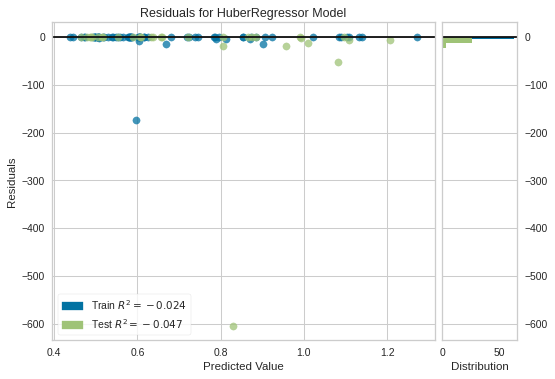

In [80]:
# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 0.75)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

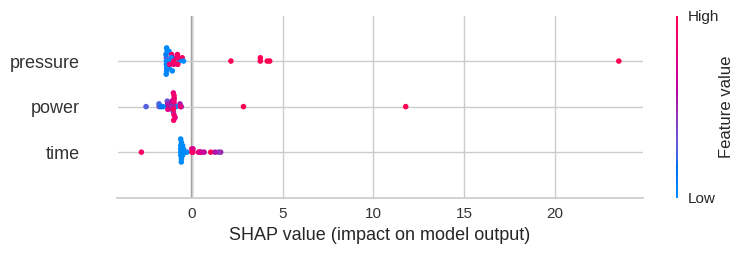

In [81]:
# train lightgbm model
rf = create_model('rf')

# interpret summary model
interpret_model(rf, plot = 'summary')

In [82]:
# reason plot for test set observation 1
interpret_model(rf, plot = 'reason', observation = 1)

In [83]:
interpret_model(rf, plot='pdp', feature='power',scale=0.5)

In [84]:
interpret_model(rf, plot='pdp', feature='time',scale=0.1)

In [85]:
interpret_model(rf, plot='pdp', feature='pressure')

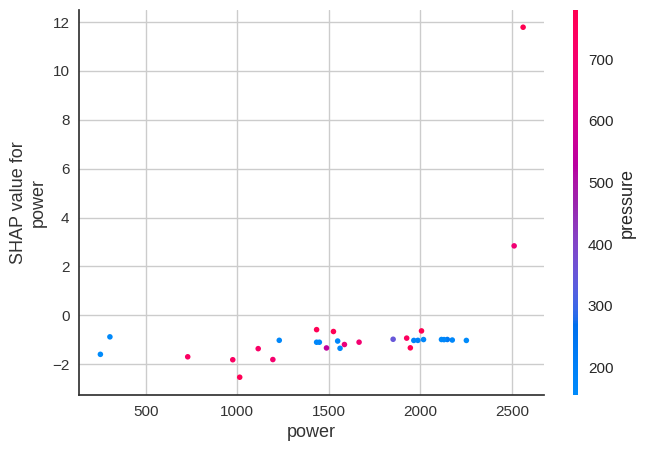

In [86]:
interpret_model(rf, plot='correlation', feature='power')

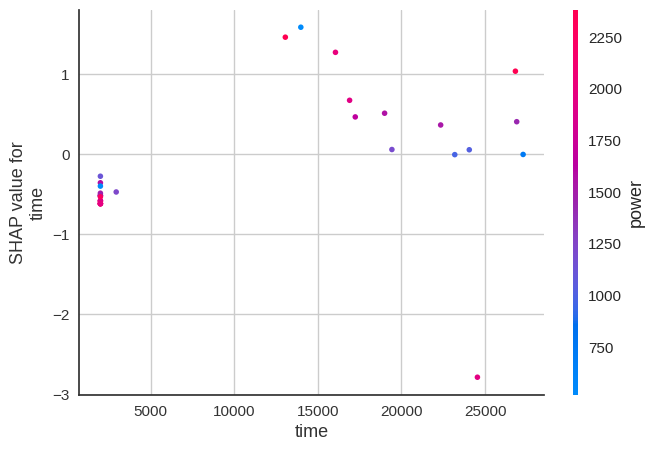

In [87]:
interpret_model(rf, plot='correlation', feature='time')

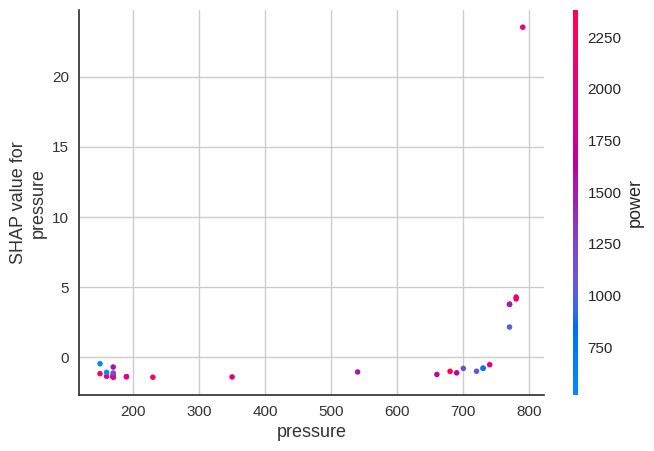

In [88]:
interpret_model(rf, plot='correlation', feature='pressure')

In [89]:
interpret_model(rf, plot='pfi')

3it [00:00, 32.63it/s]
